<a href="https://colab.research.google.com/github/Sikandarh11/Practice-Machine-Learning-Algorithms/blob/main/Practice_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import LeakyReLU

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.max()

9

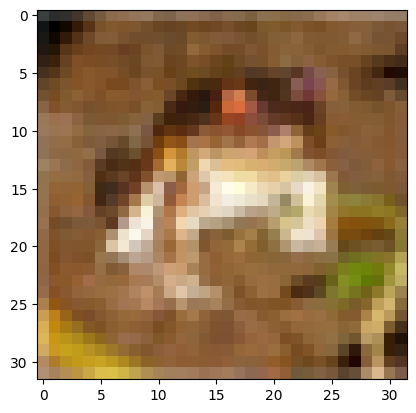

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [6]:
X_train = X_train/9
X_test = X_test/9

In [7]:
X_train[0]

array([[[ 6.55555556,  6.88888889,  7.        ],
        [ 4.77777778,  5.11111111,  5.        ],
        [ 5.55555556,  5.33333333,  4.77777778],
        ...,
        [17.55555556, 14.66666667, 12.        ],
        [16.88888889, 13.88888889, 11.33333333],
        [16.44444444, 13.77777778, 11.44444444]],

       [[ 1.77777778,  2.22222222,  2.22222222],
        [ 0.        ,  0.        ,  0.        ],
        [ 2.        ,  0.88888889,  0.        ],
        ...,
        [13.66666667,  9.77777778,  6.11111111],
        [13.22222222,  9.22222222,  5.55555556],
        [13.55555556,  9.66666667,  6.33333333]],

       [[ 2.77777778,  2.66666667,  2.33333333],
        [ 1.77777778,  0.77777778,  0.        ],
        [ 5.44444444,  3.        ,  0.88888889],
        ...,
        [13.11111111,  9.33333333,  5.55555556],
        [13.33333333,  9.33333333,  5.55555556],
        [12.11111111,  8.11111111,  4.66666667]],

       ...,

       [[23.11111111, 18.88888889, 10.66666667],
        [22

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU

model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(10, activation='softmax'))


In [39]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

In [40]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [41]:
history = model.fit(X_train, y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
1250/1250 [==============================] - 17s 13ms/step - loss: 1.5035 - accuracy: 0.4513 - val_loss: 1.1633 - val_accuracy: 0.5884
Epoch 2/50
1250/1250 [==============================] - 16s 13ms/step - loss: 1.0424 - accuracy: 0.6353 - val_loss: 0.9911 - val_accuracy: 0.6562
Epoch 3/50
1250/1250 [==============================] - 15s 12ms/step - loss: 0.8502 - accuracy: 0.7064 - val_loss: 0.8789 - val_accuracy: 0.6975
Epoch 4/50
1250/1250 [==============================] - 16s 13ms/step - loss: 0.7085 - accuracy: 0.7544 - val_loss: 0.8931 - val_accuracy: 0.7025
Epoch 5/50
1250/1250 [==============================] - 15s 12ms/step - loss: 0.6025 - accuracy: 0.7920 - val_loss: 0.8479 - val_accuracy: 0.7250
Epoch 6/50
1250/1250 [==============================] - 16s 12ms/step - loss: 0.4960 - accuracy: 0.8282 - val_loss: 0.9349 - val_accuracy: 0.7017
Epoch 7/50
1250/1250 [==============================] - 16s 13ms/step - loss: 0.4234 - accuracy: 0.8562 - val_loss: 0.9120 -

In [32]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.498

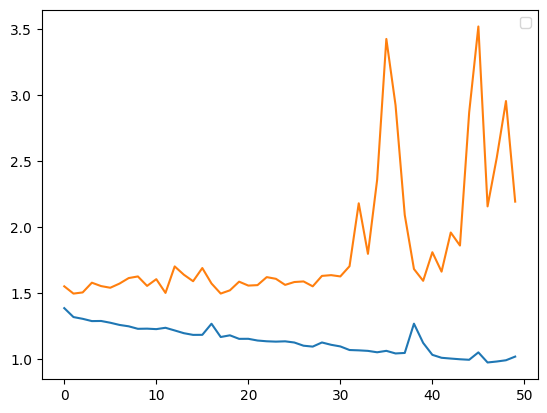

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()

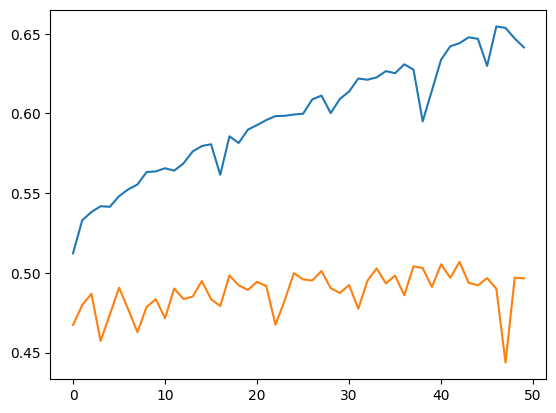

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])